Angelique's Lab, Wednesday Oct 19th  
**Collaborated with student Sophie Guo, Fanxi Chen, and Yitong Zhao**

### Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # run OLS linear regression
from statsmodels.graphics.factorplots import interaction_plot # plot interaction

In [2]:
spending = pd.read_csv("../W8/lab07_customers.csv")
spending.head()

,spend,race,income,age,sex,schoolYears
0,715.243646,white,38511.0,34.0,male,0.0
1,883.720255,other,280882.0,38.0,male,0.0
2,755.915697,white,160952.0,48.0,female,0.0
3,652.697972,white,73221.0,32.0,male,0.0
4,575.359129,white,17415.0,29.0,male,0.0


### 1. Transform Income so that it looks more normal

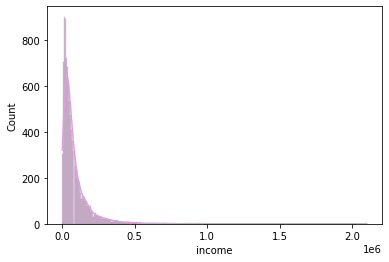

In [3]:
# original Income distribution 
sns.histplot(x = spending["income"], color = "plum", label = "Income", kde = True)
plt.show()

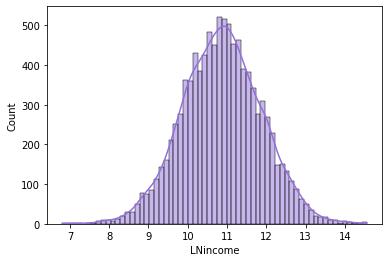

In [4]:
# log-income distribution
spending["LNincome"] = np.log(spending["income"])
sns.histplot(x = spending["LNincome"], color = "mediumpurple", label = "Income", kde = True)
plt.show()

### 2. Compute average spending by race

In [5]:
pd.DataFrame(spending.groupby("race")["spend"].mean()).reset_index()

,race,spend
0,asian,818.565036
1,black,648.428084
2,hispanic,824.617968
3,other,751.173088
4,white,757.135785


### 3. Compute average spending by sex

In [6]:
pd.DataFrame(spending.groupby("sex")["spend"].mean()).reset_index()

,sex,spend
0,female,756.432118
1,male,757.865659
2,other,530.667378


### 4. We have reason to believe that groups of Hispanic Men and Black Women spend differently from other groups, and from each other.

In [7]:
sp = pd.concat([spending, pd.get_dummies(spending[["race", "sex"]], prefix = ["race", "sex"])], axis = 1)
sp["hispanic_male"] = sp.apply(lambda x: 1 if (x["race"] == "hispanic") & (x["sex"] == "male") else 0, axis = 1)
sp["black_female"] = sp.apply(lambda x: 1 if (x["race"] == "black") & (x["sex"] == "female") else 0, axis = 1)

In [8]:
# use race_other and sex_other as reference
model_Q4 = sm.OLS(sp["spend"], sm.add_constant(sp[["race_asian", "race_black", "race_hispanic", "race_white",
                                                    "sex_male", "sex_female",
                                                    "hispanic_male", "black_female"]]) ).fit()
model_Q4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     542.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:52:37   Log-Likelihood:                -59924.
No. Observations:               10000   AIC:                         1.199e+05
Df Residuals:                    9991   BIC:                         1.199e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           527.1016     28.102     18.756      0.000     472.015     582.188
race_asian       67.7650      4.773     14.196      0.000      58.408      77.122
race_black        5.2875      5.042      1.049      0.294      -4.596      15.171
race_hispanic    -6.5706      4.767     -1.378      0.168     -15.915       2.773
race_white        6.9914      3.155      2.216      0.027       0.806      13.177
sex_male        200.3696     28.035      7.147      0.000     145.415     255.324
sex_female      245.5649     28.018      8.764      0.000     190.644     300.486
hispanic_male   168.4448      5.737     29.359      0.000     157.198     179.691
black_female   -218.3027      6.101    -35.780      0.000    -230.263    -206.343
==============================================================================
Omnibus:                      650.975   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1648.783
Skew:                           0.383   Prob(JB):                         0.00
Kurtosis:                       4.836   Cond. No.                         69.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

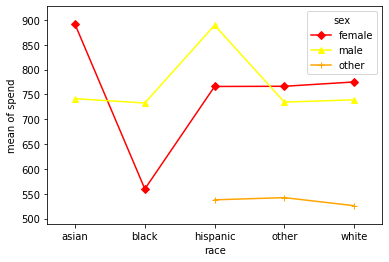

In [9]:
interaction_plot(
    x=sp["race"],
    trace=sp["sex"],
    response=sp["spend"],
    colors=["red", "yellow", "orange"],
    markers=["D", "^", "+"],
)
plt.show()

In [10]:
print("average spending for Hispanic men:", sp.loc[sp["hispanic_male"] == 1, "spend"].mean(),
      "\naverage spending for Black women:", sp.loc[sp["black_female"] == 1, "spend"].mean(),
      "\naverage spending for other groups:", sp.loc[(sp["hispanic_male"] == 0) & (sp["black_female"] == 0), "spend"].mean())

average spending for Hispanic men: 889.3453944682735 
average spending for Black women: 559.6512404271946 
average spending for other groups: 759.9069706489583


### 5. We also believe that Asian Women with Higher education are great customers (spend more).

In [11]:
sp["asian_female"] = sp.apply(lambda x: 1 if (x["race"] == "asian") & (x["sex"] == "female") else 0, axis = 1)
sp["educated_female"] = sp.apply(lambda x: 1 if (x["sex"] == "female") & (x["schoolYears"] == 1) else 0, axis = 1)
sp["educated_asian"] = sp.apply(lambda x: 1 if (x["race"] == "asian") & (x["schoolYears"] == 1) else 0, axis = 1)
sp["educated_asian_female"] = sp.apply(lambda x: 1 if (x["race"] == "asian") & (x["sex"] == "female") & (x["schoolYears"] == 1) else 0, axis = 1)
sp.head()

,spend,race,income,age,sex,schoolYears,LNincome,race_asian,race_black,race_hispanic,...,race_white,sex_female,sex_male,sex_other,hispanic_male,black_female,asian_female,educated_female,educated_asian,educated_asian_female
0,715.243646,white,38511.0,34.0,male,0.0,10.558699,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,883.720255,other,280882.0,38.0,male,0.0,12.545690,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,755.915697,white,160952.0,48.0,female,0.0,11.988861,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,652.697972,white,73221.0,32.0,male,0.0,11.201238,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,575.359129,white,17415.0,29.0,male,0.0,9.765087,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [12]:
model_Q5 = sm.OLS(sp["spend"], sm.add_constant(sp[["schoolYears",
                                                   "race_asian", "race_black", "race_hispanic", "race_white",
                                                    "sex_male", "sex_female", 
                                                   "asian_female", "educated_female", "educated_asian",
                                                   "educated_asian_female"]]) ).fit()
model_Q5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     360.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:52:38   Log-Likelihood:                -60602.
No. Observations:               10000   AIC:                         1.212e+05
Df Residuals:                    9992   BIC:                         1.213e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   514.7708     30.067     17.121      0.000     455.832     573.709
schoolYears              32.6187      1.685     19.359      0.000      29.316      35.922
race_asian              -17.4448      6.714     -2.598      0.009     -30.606      -4.284
race_black             -103.7928      4.328    -23.981      0.000    -112.277     -95.309
race_hispanic            73.2174      4.181     17.513      0.000      65.022      81.413
race_white                5.5406      3.376      1.641      0.101      -1.078      12.159
sex_male                244.1028     29.982      8.142      0.000     185.332     302.874
sex_female              230.4466     29.980      7.687      0.000     171.680     289.213
asian_female             32.6187      1.685     19.359      0.000      29.316      35.922
educated_female          32.6187      1.685     19.359      0.000      29.316      35.922
educated_asian           32.6187      1.685     19.359      0.000      29.316      35.922
educated_asian_female    32.6187      1.685     19.359      0.000      29.316      35.922
==============================================================================
Omnibus:                      509.420   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.165
Skew:                           0.337   Prob(JB):                    1.56e-243
Kurtosis:                       4.493   Cond. No.                     7.43e+64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.44e-126. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
print("average spending for Asian women with higher education:", sp.loc[sp["educated_asian_female"] == 1, "spend"].mean(),
      "\naverage spending for other groups:", sp.loc[sp["educated_asian_female"] == 0, "spend"].mean())

average spending for Asian women with higher education: 890.865899472086 
average spending for other groups: 752.2164410795363


### 6. Fit a model to test the hypotheses in steps 4 and 5, report parameter estimates and R2

In [14]:
model_Q6 = sm.OLS(sp["spend"], sm.add_constant(sp[["schoolYears",
                                                   "race_asian", "race_black", "race_hispanic", "race_white",
                                                    "sex_male", "sex_female", 
                                                    "hispanic_male", "black_female", "asian_female", "educated_female", "educated_asian",
                                                   "educated_asian_female"]]) ).fit()
model_Q6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     515.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:52:38   Log-Likelihood:                -59820.
No. Observations:               10000   AIC:                         1.197e+05
Df Residuals:                    9990   BIC:                         1.197e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   526.4950     27.814     18.929      0.000     471.975     581.015
schoolYears              22.8309      1.577     14.477      0.000      19.740      25.922
race_asian                8.6710      6.243      1.389      0.165      -3.567      20.909
race_black                0.0009      5.004      0.000      1.000      -9.807       9.809
race_hispanic            -1.9561      4.729     -0.414      0.679     -11.225       7.313
race_white                6.7476      3.123      2.161      0.031       0.626      12.869
sex_male                206.2627     27.750      7.433      0.000     151.867     260.658
sex_female              241.5456     27.732      8.710      0.000     187.186     295.905
hispanic_male           158.5438      5.719     27.720      0.000     147.332     169.755
black_female           -208.3903      6.077    -34.290      0.000    -220.303    -196.478
asian_female             22.8309      1.577     14.477      0.000      19.740      25.922
educated_female          22.8309      1.577     14.477      0.000      19.740      25.922
educated_asian           22.8309      1.577     14.477      0.000      19.740      25.922
educated_asian_female    22.8309      1.577     14.477      0.000      19.740      25.922
==============================================================================
Omnibus:                      693.660   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1830.767
Skew:                           0.396   Prob(JB):                         0.00
Kurtosis:                       4.941   Cond. No.                     1.38e+62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1e-120. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
model_Q6.params

const                    526.495028
schoolYears               22.830856
race_asian                 8.671019
race_black                 0.000931
race_hispanic             -1.956105
race_white                 6.747552
sex_male                 206.262717
sex_female               241.545572
hispanic_male            158.543755
black_female            -208.390290
asian_female              22.830856
educated_female           22.830856
educated_asian            22.830856
educated_asian_female     22.830856
dtype: float64

*R-squared is 0.317 for this model.*

### 7. Of course income, and age probably play a factor in spending, so let’s include those, report parameter estimates and R2

In [16]:
model_Q7 = sm.OLS(sp["spend"], sm.add_constant(sp[["schoolYears", "LNincome", "age",
                                                   "race_asian", "race_black", "race_hispanic", "race_white",
                                                    "sex_male", "sex_female", 
                                                    "hispanic_male", "black_female", "asian_female", "educated_female", "educated_asian",
                                                   "educated_asian_female"]]) ).fit()
model_Q7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spend   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     5787.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:52:38   Log-Likelihood:                -51739.
No. Observations:               10000   AIC:                         1.035e+05
Df Residuals:                    9988   BIC:                         1.036e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -247.0738     13.562    -18.219      0.000    -273.657    -220.490
schoolYears              23.0173      0.703     32.744      0.000      21.639      24.395
LNincome                 16.7310      0.427     39.213      0.000      15.895      17.567
age                      20.7141      0.105    196.784      0.000      20.508      20.920
race_asian                8.5266      2.783      3.064      0.002       3.072      13.982
race_black               -0.4463      2.230     -0.200      0.841      -4.818       3.926
race_hispanic             1.1951      2.108      0.567      0.571      -2.937       5.327
race_white                5.0611      1.392      3.636      0.000       2.332       7.790
sex_male                 94.9926     12.382      7.672      0.000      70.722     119.263
sex_female             -201.2418     12.563    -16.019      0.000    -225.867    -176.617
hispanic_male           151.1170      2.550     59.269      0.000     146.119     156.115
black_female           -209.6685      2.709    -77.397      0.000    -214.979    -204.358
asian_female             23.0173      0.703     32.744      0.000      21.639      24.395
educated_female          23.0173      0.703     32.744      0.000      21.639      24.395
educated_asian           23.0173      0.703     32.744      0.000      21.639      24.395
educated_asian_female    23.0173      0.703     32.744      0.000      21.639      24.395
==============================================================================
Omnibus:                      476.497   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.176
Skew:                           0.481   Prob(JB):                    5.82e-135
Kurtosis:                       3.746   Cond. No.                     2.94e+65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-124. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
model_Q7.params

const                   -247.073758
schoolYears               23.017314
LNincome                  16.731040
age                       20.714053
race_asian                 8.526570
race_black                -0.446285
race_hispanic              1.195117
race_white                 5.061055
sex_male                  94.992568
sex_female              -201.241795
hispanic_male            151.117036
black_female            -209.668530
asian_female              23.017314
educated_female           23.017314
educated_asian            23.017314
educated_asian_female     23.017314
dtype: float64

*R-sqaured is 0.864, with a huge increase from the previous model.*

### 8. Describe the findings from your model  
- *The main effects of race for Black and Hispanic are not so significantly different from the reference case ("other" race in this case), while the main effect of Asian and White are significantly different from the base case, indicating different level of spending. Similar to this, female and male also have different purchase behavior from "other sex".*  
- *The interaction terms in interest are all significant, so they should be kept in the model for better generalization. Specifically, the coefficient of black_female is a large negative number, indicating that the spending will be largely different for Black women. Similarly, hispanic_male has a large positive coefficient, meaning that the spending behavior is also different for this group.*  
- *Including income and age largely increases the percentage variance explained by model. It indicates that income and age are two strong predictors in customer spending in this dataset.*  